## Category percentiles 

In [1]:
import pandas as pd
from siuba import *
import numpy as np

In [2]:
from dla_utils import _dla_utils
from shared_utils import geography_utils
from shared_utils import calitp_color_palette as cp

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_parquet('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/dla_df.parquet')

In [5]:
df.sample()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,unnamed:_29,uei,projectID,prepared_y,process_days,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
21478,Obligated,STPL,5012(134),Oakland,2022-04-28,2022-04-28,2022-04-28,2022-04-28,2022-05-05,0,0,540728,Authorized,5012,4,E-76 approved on,7.00,0.00,7.00,ALA130014,7th Street From Wood St To Peralta St.,"Road Diet, Bicycle Lanes, Sidewalk Enhancement...",3,2022-04-21,2022-04-22,MTC,None,None,5012,"2,022.00",14.00,Oakland,"500,661.55",0.00,0.00,Large,1,0,0,1,0,0,0,2


### Add types

In [6]:
#info = pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/locodes_updated7122021.xlsx')

In [7]:
# info

In [8]:
group = (df>>count(_.primary_agency_name)>>arrange(_.n))

In [9]:
q33 = group.n.quantile(0.33).astype(float)
q66 = group.n.quantile(0.66).astype(float)

In [10]:
def fleet_size (row):
    if ((row.n > 0) and (row.n <= q33)):
        return "Small"
    elif ((row.n > q33) and (row.n <= q66)):
        return "Medium"
    elif ((row.n > q66)):
        return "Large"
    else:
        return "No Info"


In [11]:
group["agency_size"] = group.apply(lambda x: fleet_size(x), axis=1)

In [12]:
agency_map = dict(zip(group['primary_agency_name'], 
                          group['agency_size']))

In [13]:
df['agency_size'] = df['primary_agency_name'].map(agency_map)


In [14]:
df.sample()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,unnamed:_29,uei,projectID,prepared_y,process_days,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories,agency_size
10318,Obligated,STPCML,5924(189),Sacramento County,2014-12-16,2014-12-16,2014-12-18,2014-12-18,2014-12-23,-539435,0,-932953,Authorized,5924,3,E-76 approved on E-76 approved on,0.00,2.00,5.00,VAR79017,Var Locations W/in Sacramento County (see Hist...,Asphalt Concrete Overlay / Bicycle Lanes,3,NaT,NaT,SACOG,None,None,5924,"2,014.00",7.00,Sacramento County,"-1,067,865.09","-617,441.40",0.00,Large,1,0,0,0,0,1,0,2,Large


### testing with street

In [15]:
df1 = df>>filter(_.street==1)

In [16]:
df1.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,locode,dist,status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,unnamed:_29,uei,projectID,prepared_y,process_days,primary_agency_name,adjusted_total_requested,adjusted_fed_requested,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories,agency_size
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0,5680921,5702041,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,None,None,5924,"2,018.00",23.00,Sacramento County,"6,153,086.12",0.00,"6,130,295.48",Large,0,0,0,1,0,0,0,1,Large
7,Obligated,CML,5143(030),Dinuba,2018-12-17,2018-12-19,2018-12-24,2018-12-27,2018-12-27,320000,0,431758,Authorized,5143,6,E-76 approved on,2.00,8.00,0.00,TUL10-010,Along Alta Ave A (road 80) From Kamm Ave (ave ...,Signal Synchronization,2,2018-11-21,2018-12-17,TCAG,None,None,5143,"2,018.00",10.00,Dinuba,"465,911.09","345,312.77",0.00,Large,0,0,0,1,0,0,0,1,Large
8,Obligated,HSIPLN,5370(025),Arvin,2018-10-11,2018-12-21,2018-12-27,2018-12-27,2018-12-27,-498175,0,320137,Authorized,5370,6,E-76 approved on,1.00,6.00,0.00,KER140601,Intersection Of Sr 223 And Derby Street,Traffic Signalization (tc),3,2018-10-10,2018-12-20,KCOG,None,None,5370,"2,018.00",7.00,Arvin,"345,460.60","-537,581.84",0.00,Medium,0,0,0,1,0,0,0,1,Medium
9,Obligated,STPL,5060(259),Fresno,2018-10-29,2018-10-29,2018-12-21,2018-12-27,2018-12-27,-16774,0,10919,Authorized,5060,6,E-76 approved on,NaN,59.00,0.00,FRE110622,Eaton Trail 1/4 Mile North Of Audubon Drive To...,Trail Resurfacing And Bridge Repair (tc),4,NaT,NaT,CFCG,None,None,5060,"2,018.00",NaN,Fresno,"11,782.72","-18,100.86",0.00,Large,1,0,1,1,0,1,0,4,Large
11,Obligated,HSIPL,5378(045),Palmdale,2018-12-11,2018-12-18,2018-12-27,2018-12-27,2018-12-27,545800,0,735764,Authorized,5378,7,E-76 approved on,8.00,9.00,0.00,SCAG015,Various Locations Citywide.,Upgrade Guard Rail And End Treatments,2,2018-12-04,2018-12-10,SCAG,None,None,5378,"2,018.00",17.00,Palmdale,"793,964.70","588,974.09",0.00,Large,0,0,0,1,0,0,0,1,Large


#### 99th Percentile

In [17]:
df1.adjusted_total_requested.quantile(0.99)

7526147.9940969525

In [18]:
print(f'There are {len(df1>>filter(_.adjusted_total_requested>=7189913.6))} obligations in the 99th total_requested percentile, which is {len(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.primary_agency_name))} agencies')


There are 108 obligations in the 99th total_requested percentile, which is 70 agencies


In [19]:
len(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.primary_agency_name)>>arrange(-_.n))

70

In [20]:
(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.primary_agency_name)>>arrange(-_.n))

,primary_agency_name,n
26,Los Angeles,12
45,Sacramento County,5
3,Bakersfield,4
44,Sacramento,4
55,San Jose,4
...,...,...
63,Trinity County,1
65,Victorville,1
66,West Sacramento,1
67,Windsor,1


In [21]:
(df1>>filter(_.adjusted_total_requested>=7189913.6)>>count(_.agency_size)>>arrange(-_.n))

,agency_size,n
0,Large,84
1,Medium,23
2,Small,1


#### First Quantile

In [22]:
df1.adjusted_total_requested.quantile(0.1)

-101728.62490740998

In [23]:
len(df1.adjusted_total_requested<=-104013.1)

10096

In [24]:
(df1>>filter(_.adjusted_total_requested<=-104013.1)>>count(_.agency_size)>>arrange(-_.n))

,agency_size,n
0,Large,753
1,Medium,179
2,Small,57


In [25]:
(df1>>filter(_.adjusted_total_requested<=-104013.1)>>count(_.primary_agency_name)>>arrange(-_.n))

,primary_agency_name,n
131,Los Angeles,32
109,Kern County,31
10,Bakersfield,28
84,Fresno,22
230,San Joaquin County,20
...,...,...
292,Walnut,1
295,Watsonville,1
298,Whittier,1
304,Yreka City,1


### Grouping by Project Category

In [26]:
pcs = (
    df1
    >> group_by(_.primary_agency_name, _.project_no)
    >> summarize(sums = _.adjusted_total_requested.sum())
)

In [27]:
pcs

,primary_agency_name,project_no,sums
0,Alameda,5014(031),148.80
1,Alameda,5014(035),"39,771.68"
2,Alameda,5014(038),"896,939.71"
3,Alameda,5014(041),"1,476,713.56"
4,Alameda,5014(046),"5,190,890.76"
...,...,...,...
3600,NaN,130R(294),"1,539,961.46"
3601,NaN,130R(295),"1,629,588.85"
3602,NaN,130R(296),"1,508,851.13"
3603,NaN,130R(297),"2,458,271.82"


In [28]:
#making sure the sums count all the same project numbers 
(
    df1
    >> group_by(_.primary_agency_name, _.project_no)
    >> count(_.project_no)
)

,primary_agency_name,project_no,n
0,Alameda,5014(031),1
1,Alameda,5014(035),1
2,Alameda,5014(038),2
3,Alameda,5014(041),4
4,Alameda,5014(046),3
...,...,...,...
3600,NaN,130R(294),1
3601,NaN,130R(295),1
3602,NaN,130R(296),1
3603,NaN,130R(297),1


In [29]:
df1>>filter(_.project_no==('5014(041)'))>>summarize(sums= _.adjusted_total_requested.sum())


,sums
0,"1,476,713.56"


In [30]:
pcs >> filter(_.sums <= -104013.1) >> count(_.primary_agency_name)>> arrange(-_.n)

,primary_agency_name,n
36,Los Angeles,13
42,Modesto,9
92,Stockton,8
76,San Joaquin County,6
1,Bakersfield,5
...,...,...
103,Walnut Creek,1
104,Wasco,1
106,Yuba City,1
107,Yuba County,1


* agencies with multiple project numbers still fall under the 1st percentile quantile (based on individual obligations)
* when grouped by project number, the number of agencies falls from 291 to 106

In [31]:
## checking the 99th percentile

len(pcs >> filter(_.sums >= 7189913.6) >> count(_.primary_agency_name) >> arrange(-_.n))

73

* for the 99th percentile, the numbers of agencies that in this category only falls by 2 when grouping by project numbers 

### Grouping By Organization

In [32]:
orgs = (
    df1
    >> group_by(_.primary_agency_name)
    >> summarize(sums = _.adjusted_total_requested.sum())
)

In [33]:
orgs.sums.quantile(0.05)

25621.172171556293

In [34]:
orgs.sums.quantile(0.95)

46833606.453516774

In [35]:
#filtering

In [36]:
len(orgs>>filter(_.sums <= 27875.2) >> count(_.primary_agency_name))

26

In [37]:
(orgs>>filter(_.sums <= 27875.2) >> count(_.primary_agency_name))

,primary_agency_name,n
0,Amador County Transportation Commission,1
1,Atascadero,1
2,Baldwin Park,1
3,Butte County Association of Governments,1
4,Cloverdale,1
5,Corcoran,1
6,Desert Hot Springs,1
7,El Segundo,1
8,"Golden Gate Bridge, Highway And Transportation...",1
9,Hesperia,1


In [38]:
len(orgs>>filter(_.sums >= 41481561.3) >> count(_.primary_agency_name))

29

In [39]:
(orgs>>filter(_.sums >= 41481561.3) >> count(_.primary_agency_name))

,primary_agency_name,n
0,Bakersfield,1
1,Caltrans,1
2,Coachella Valley Association of Governments,1
3,Contra Costa County,1
4,Fresno,1
5,Fresno County,1
6,Kern County,1
7,Lancaster,1
8,Long Beach,1
9,Los Angeles,1


#### plotting distributions

In [40]:
import seaborn as sns

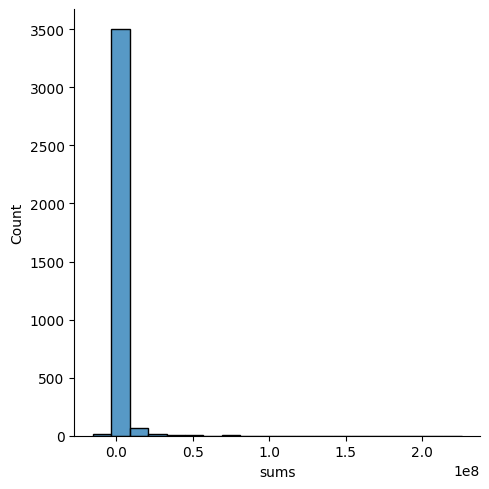

In [41]:
## FLAG: not running
sns.displot(pcs, x="sums", bins=20)

In [42]:
#import altair as alt

In [43]:
## runs error for too many rows
# alt.Chart(df1).mark_bar().encode(
#     alt.X("adjusted_total_requested:Q", bin=True),
#     y='count()',
# )